This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [6]:
import tensorflow

In [7]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#1 in case I just want to import mnist/ code above == this code

'''
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
'''

In [ ]:
#2 tensorflow --> tf
'''
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
'''

In [8]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

In [14]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [16]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [17]:
train_images[0].shape

(28, 28)

In [18]:
train_images = train_images.reshape((60000, 28 * 28))

In [19]:
train_images.shape

(60000, 784)

In [21]:
train_images[0].shape

(784,)

In [22]:
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [26]:
train_images = train_images.astype("float32") / 255

In [27]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [28]:
'''
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255
'''

**"Fitting" the model**

In [29]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 1.5054 - accuracy: 0.6572
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6081 - accuracy: 0.8485
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8871
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8996
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3283 - accuracy: 0.9058


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [31]:
test_images.shape

(10000, 784)

In [34]:
test_digits = test_images[0:10] # take first 10 images

In [33]:
test_digits.shape

(10, 784)

In [35]:
#test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([4.5852321e-05, 5.6987801e-08, 2.1815991e-05, 5.7461642e-04,
       1.3212691e-06, 2.2982475e-05, 1.0754666e-08, 9.9786311e-01,
       7.2536868e-06, 1.4630092e-03], dtype=float32)

In [36]:
predictions[0].argmax()

7

In [37]:
predictions[0][7]

0.9978631

In [38]:
test_labels[0]

7

**Evaluating the model on new data**

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3074 - accuracy: 0.9128
test_acc: 0.9128000140190125


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [40]:
import numpy as np
x = np.array(12)
x

array(12)

In [41]:
x.ndim

0

### Vectors (rank-1 tensors)

In [42]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [43]:
x.ndim

1

### Matrices (rank-2 tensors)

In [44]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [45]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [46]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [47]:
train_images.ndim

3

In [48]:
train_images.shape

(60000, 28, 28)

In [49]:
train_images.dtype

dtype('uint8')

In [50]:
2**8 # each values: 0-255

256

**Displaying the fourth digit**

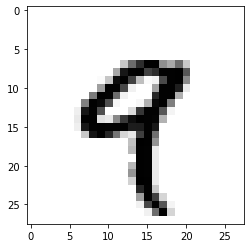

In [52]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [53]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [54]:
train_images.shape

(60000, 28, 28)

In [55]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [56]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [57]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [71]:
my_slice = train_images[:, 14:, 14:]

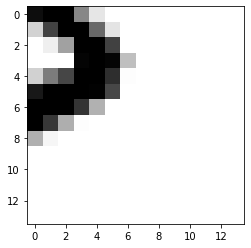

In [72]:
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

In [63]:
my_slice = train_images[:, 7:-7, 7:-7]

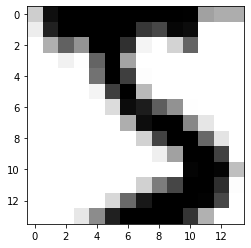

In [64]:
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

In [66]:
train_labels[0]

5

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [87]:
def naive_relu(x):
    assert len(x.shape) == 2, 'x.ndim() must be 2'
    x = x.copy() # 해당 코드가 없으면 함수 실행 후 x를 출력하면 x의 각 요소값이 바뀌어있음.(아래 설명)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
''' 중요!!!
y = x           -> y와 x가 동일한 memory slot(address)을 share.
                -> x를 바꾸면 y가 함께 바뀜.
y = x.copy()    -> x의 사본을 만들어서 사용함. x와 y는 별개가 됨.
'''

In [76]:
import numpy as np

In [77]:
x1 = np.array([[1,-2,3], [2,3,-1]])
x1

array([[ 1, -2,  3],
       [ 2,  3, -1]])

In [80]:
x1.ndim # x1.ndim == len(x1.shape)

2

In [78]:
x1.shape

(2, 3)

In [79]:
len(x1.shape)

2

In [81]:
x1

array([[ 1, -2,  3],
       [ 2,  3, -1]])

In [84]:
naive_relu(x1)

array([[1, 0, 3],
       [2, 3, 0]])

In [85]:
x2 = np.array([1,2,3,-4])

In [88]:
naive_relu(x2)

AssertionError: ignored

In [89]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

cmp1) coded version of addition and relu

> FASTER than naive implementation





In [90]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
 
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


cmp2) naive version of addition and relu


> SLOWER than coded version



In [91]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.82 s


### Broadcasting

In [110]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [95]:
X.shape

(32, 10)

In [109]:
X

array([[0.94868271, 0.62374816, 0.74056993, 0.66866927, 0.18315572,
        0.1470028 , 0.81857225, 0.30189455, 0.38312119, 0.90978364],
       [0.10264114, 0.3252714 , 0.71627495, 0.33619974, 0.37518583,
        0.62212072, 0.46780273, 0.83220061, 0.20414786, 0.25617038],
       [0.41183675, 0.7884386 , 0.63080407, 0.19794219, 0.25444933,
        0.15629071, 0.72378869, 0.11471202, 0.49682581, 0.27362217],
       [0.75738879, 0.7299333 , 0.09635305, 0.07104631, 0.01746719,
        0.25565612, 0.92830984, 0.57994513, 0.70416421, 0.08511291],
       [0.64101132, 0.42410249, 0.72389366, 0.30294458, 0.24964731,
        0.81393644, 0.80543081, 0.74019011, 0.3911316 , 0.41647322],
       [0.81190594, 0.60861133, 0.06624601, 0.20803403, 0.10595591,
        0.92439115, 0.22042448, 0.24623106, 0.66487497, 0.15671089],
       [0.6220352 , 0.58270122, 0.11092089, 0.22403805, 0.08890451,
        0.15151186, 0.77284264, 0.85454036, 0.05972947, 0.56526449],
       [0.66455307, 0.37577606, 0.1425889

In [96]:
y.shape

(10,)

In [98]:
y

array([0.23316403, 0.76788182, 0.65484026, 0.48061694, 0.82189696,
       0.39797549, 0.53689102, 0.77317568, 0.57714129, 0.51362286])

In [99]:
y = np.expand_dims(y, axis=0) #axis = 0 의 의미: 첫번째 축에 차원 추가 / shape (10,)->(1,10)

In [100]:
y

array([[0.23316403, 0.76788182, 0.65484026, 0.48061694, 0.82189696,
        0.39797549, 0.53689102, 0.77317568, 0.57714129, 0.51362286]])

In [101]:
y.shape

(1, 10)

In [102]:
Y = np.concatenate([y] * 32, axis=0)

In [103]:
Y.shape

(32, 10)

In [112]:
X+y

array([[1.69159445, 0.67544499, 1.14725061, 0.58889061, 1.87373659,
        1.11589155, 0.94024493, 0.8357366 , 1.83339085, 0.78313965],
       [1.38132764, 0.74263028, 0.88968752, 1.1189577 , 1.20683193,
        0.80013546, 1.39280095, 1.19055445, 1.07383937, 0.23933999],
       [0.99706063, 0.90120904, 0.3822239 , 1.27690473, 1.71335351,
        0.98422323, 0.6441047 , 0.86183853, 1.66814966, 0.77068335],
       [1.44853729, 0.92065931, 0.53473926, 0.43165155, 1.80804945,
        1.40307193, 0.87902262, 1.488295  , 1.43129427, 0.63053601],
       [1.7047194 , 0.72296988, 1.00431447, 0.83007404, 1.69656325,
        1.04971646, 1.2503511 , 1.08272179, 0.87267137, 0.19945472],
       [1.11278298, 1.47217981, 0.27185294, 1.25545767, 1.6800676 ,
        0.7161956 , 0.73926744, 1.43642989, 0.90428037, 0.31162985],
       [1.97279473, 1.13359255, 0.27386014, 1.37865696, 1.81900111,
        1.46260841, 0.75538252, 1.27715888, 1.65277047, 0.95264208],
       [1.32836496, 0.75547273, 1.0740145

In [113]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0] # 1D tensor에서 shape[0]는 행렬 차원에서는 열 수라고도 볼 수 있음.
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [114]:
naive_add_matrix_and_vector(X, y)

array([[1.69159445, 0.67544499, 1.14725061, 0.58889061, 1.87373659,
        1.11589155, 0.94024493, 0.8357366 , 1.83339085, 0.78313965],
       [1.38132764, 0.74263028, 0.88968752, 1.1189577 , 1.20683193,
        0.80013546, 1.39280095, 1.19055445, 1.07383937, 0.23933999],
       [0.99706063, 0.90120904, 0.3822239 , 1.27690473, 1.71335351,
        0.98422323, 0.6441047 , 0.86183853, 1.66814966, 0.77068335],
       [1.44853729, 0.92065931, 0.53473926, 0.43165155, 1.80804945,
        1.40307193, 0.87902262, 1.488295  , 1.43129427, 0.63053601],
       [1.7047194 , 0.72296988, 1.00431447, 0.83007404, 1.69656325,
        1.04971646, 1.2503511 , 1.08272179, 0.87267137, 0.19945472],
       [1.11278298, 1.47217981, 0.27185294, 1.25545767, 1.6800676 ,
        0.7161956 , 0.73926744, 1.43642989, 0.90428037, 0.31162985],
       [1.97279473, 1.13359255, 0.27386014, 1.37865696, 1.81900111,
        1.46260841, 0.75538252, 1.27715888, 1.65277047, 0.95264208],
       [1.32836496, 0.75547273, 1.0740145

In [130]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y) # maximum(a1,a2)에서 a1.ndim != a2.ndim이면 하나를 broadcasting해주고 나서 각각의 위치에서의 maximum value를 넣어줌.

In [131]:
def naive_add_matrix_and_vector_2(x, y):
    assert len(x.shape) == 4
    assert len(y.shape) == 2
    assert x.shape[2] == y.shape[0] and x.shape[3] == y.shape[1], 'x.shape[2]와 y.shape[0], x.shape[3]와 y.shape[1]이 같아야합니다.' # 1D tensor에서 shape[0]는 행렬 차원에서는 열 수라고도 볼 수 있음.
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
          for k in range(x.shape[2]):
            for h in range(x.shape[3]):
              x[i, j, k, h] += y[k, h]
    return x

In [132]:
naive_add_matrix_and_vector_2(x, y)

array([[[[1.16200937, 0.49937678, 0.57944077, ..., 1.14715833,
          0.92580529, 0.66688325],
         [0.92562538, 0.83773521, 0.95354353, ..., 0.60469339,
          0.65453496, 1.20554947],
         [1.37703383, 1.73156004, 1.09996898, ..., 1.1279074 ,
          1.03055347, 1.0881539 ],
         ...,
         [0.75714894, 1.00832217, 0.70485406, ..., 0.88839086,
          1.30356907, 1.8083937 ],
         [1.27925741, 0.78389799, 1.04616229, ..., 0.47839159,
          0.31080603, 0.41256183],
         [1.09883483, 1.38923792, 1.28265806, ..., 0.93207667,
          0.11984518, 0.64719238]],

        [[1.22257385, 0.36862516, 1.27961372, ..., 0.82412386,
          0.16434427, 0.90442178],
         [0.47084262, 1.55224636, 0.40808496, ..., 0.9926557 ,
          0.28686111, 1.29136723],
         [1.01739265, 1.635464  , 1.22002497, ..., 1.57254927,
          0.66832244, 1.5258077 ],
         ...,
         [0.96583288, 1.47502524, 0.35685937, ..., 0.92970274,
          1.11713094, 1.7

In [133]:
x+y 
# 차원의 짝이 맞기 때문에(x.shape = (64, 3, 32, 10), y.shape = (32,10)) 
#두 텐서 모두 2차원 이상의 텐서임에도 자동으로 브로드캐스팅되어 연산이 수행되었음.

array([[[[1.16200937, 0.49937678, 0.57944077, ..., 1.14715833,
          0.92580529, 0.66688325],
         [0.92562538, 0.83773521, 0.95354353, ..., 0.60469339,
          0.65453496, 1.20554947],
         [1.37703383, 1.73156004, 1.09996898, ..., 1.1279074 ,
          1.03055347, 1.0881539 ],
         ...,
         [0.75714894, 1.00832217, 0.70485406, ..., 0.88839086,
          1.30356907, 1.8083937 ],
         [1.27925741, 0.78389799, 1.04616229, ..., 0.47839159,
          0.31080603, 0.41256183],
         [1.09883483, 1.38923792, 1.28265806, ..., 0.93207667,
          0.11984518, 0.64719238]],

        [[1.22257385, 0.36862516, 1.27961372, ..., 0.82412386,
          0.16434427, 0.90442178],
         [0.47084262, 1.55224636, 0.40808496, ..., 0.9926557 ,
          0.28686111, 1.29136723],
         [1.01739265, 1.635464  , 1.22002497, ..., 1.57254927,
          0.66832244, 1.5258077 ],
         ...,
         [0.96583288, 1.47502524, 0.35685937, ..., 0.92970274,
          1.11713094, 1.7

### Tensor product

In [140]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [144]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [145]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [146]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [147]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [134]:
train_images = train_images.reshape((60000, 28 * 28))

In [135]:
train_images.shape

(60000, 784)

In [136]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [138]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [139]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [5]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [6]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [13]:
tf.random.uniform((2, 2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.03876293, 0.53462875],
       [0.74965584, 0.95429087]], dtype=float32)>

In [9]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [16]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [17]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.2381828, 1.2381828],
        [0.5674467, 0.5674467]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [18]:
from tensorflow.keras.datasets import mnist

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

11501568/11490434 [==============================] - 0s 0us/step


In [20]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.1018 - accuracy: 0.7504
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5226 - accuracy: 0.8729
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8910
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.9003
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.9065


In [23]:
60000/128

468.75

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.11
loss at batch 100: 2.23
loss at batch 200: 2.18
loss at batch 300: 2.06
loss at batch 400: 2.20
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.87
loss at batch 200: 1.81
loss at batch 300: 1.68
loss at batch 400: 1.82
Epoch 2
loss at batch 0: 1.57
loss at batch 100: 1.58
loss at batch 200: 1.49
loss at batch 300: 1.41
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.34
loss at batch 200: 1.23
loss at batch 300: 1.20
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.16
loss at batch 200: 1.03
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.02
loss at batch 200: 0.89
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.78
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [ ]:
import numpy as np

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")
# accuracy가 낮은 이유: BatchGenerator에 shuffled indices가 제공되지 않아서...

accuracy: 0.82


## Summary